In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [2]:
PATH = "Churn_Modelling.csv"

In [3]:
# LOAD/CHECK DATA
df = pd.read_csv(PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# DROP NON SIGNIFICANT COLUMNS
dd = df.drop(['RowNumber', 'CustomerId', 'Surname'],
            axis=1)
dd.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# CONVERT CATEGORICAL DATA
dd_conv = pd.get_dummies(dd,
                        columns=['Geography','Gender'],
                        drop_first=True)
dd_conv.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [6]:
# SCALE DATA TO A MEAN OF ZERO AND VARIANCE OF ONE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dd_scaled = pd.DataFrame(scaler.fit_transform(dd_conv),
                        columns=dd_conv.columns)
dd_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,-0.578736,1.742740,-1.095988


In [7]:
# SEPARATE FEATURES AND LABELS
labels = dd_conv[['Exited']]
features = dd_scaled[dd_scaled.columns]
features.drop(['Exited'],
            axis=1,
            inplace=True)

features.head()
labels.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [8]:
# CHECK BALANCE BETWEEN CLASSES
labels['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
# Data is not balanced
# We will use SMOTE to upsample new data for class "1"

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features,
                                labels)

Using TensorFlow backend.


In [11]:
X_res = pd.DataFrame(X_res,
                    columns=features.columns)
X_res.head()
y_res = pd.DataFrame(y_res,
                    columns=labels.columns)
y_res.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
# CHECK AGAIN BALANCE BETWEEN CLASSES
y_res['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [13]:
# CLASSES ARE NOW BALANCED

In [14]:
# PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_res)

In [16]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                      'principal component 2'])
finalDf = pd.concat([principalDf,
                    y_res[['Exited']]],
                    axis = 1)
finalDf.head()

,principal component 1,principal component 2,Exited
0,0.687321,-0.604259,1
1,1.052704,-1.403125,0
2,0.300758,2.221161,1
3,1.179001,0.686603,0
4,0.590463,-1.296518,0


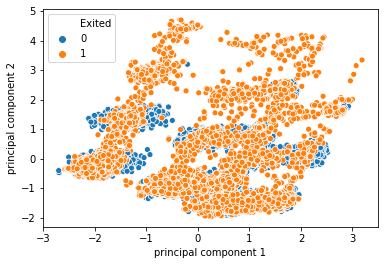

In [17]:
sns.scatterplot(x="principal component 1",
                y="principal component 2",
                hue="Exited",
                data=finalDf)

In [18]:
# SPLIT DATA TO TRAIN/TEST
msk = np.random.rand(len(X_res)) < 0.8
X_train = X_res[msk]
X_test = X_res[~msk]
Y_train = y_res[msk]
Y_test = y_res[~msk]

In [19]:
# CREATE CLASSIFIERS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [20]:
svc = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = xgb.XGBClassifier(n_estimators=300)

In [21]:
svc.fit(X_train,
        Y_train)
knn.fit(X_train,
        Y_train)
rfc.fit(X_train,
        Y_train)
ada.fit(X_train,
        Y_train)
xgb.fit(X_train,
        Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
svc_predictions = svc.predict(X_test)
print('svc accuracy',accuracy_score(svc_predictions, Y_test))

svc accuracy 0.8228571428571428


In [23]:
knn_predictions = knn.predict(X_test)
print('knn accuracy',accuracy_score(knn_predictions, Y_test))

knn accuracy 0.849624060150376


In [24]:
rfc_predictions = rfc.predict(X_test)
print('rfc accuracy',accuracy_score(rfc_predictions, Y_test))

rfc accuracy 0.9025563909774436


In [25]:
ada_predictions = ada.predict(X_test)
print('ada accuracy',accuracy_score(ada_predictions, Y_test))

ada accuracy 0.8309774436090226


In [26]:
xgb_predictions = xgb.predict(X_test)
print('xgb accuracy',accuracy_score(xgb_predictions, Y_test))

xgb accuracy 0.9010526315789473


In [ ]:
# XGBOOST OUTPERFORMS ALL OTHER MODELS WITH 90% ACCURACY

In [27]:
# LET'S VISUALIZE THE RELATION BETWEEN BAD PREDICTIONS OF CLASSIFIERS
svc_wrong = 1*abs(svc_predictions-Y_test['Exited'].to_numpy())
knn_wrong = 1*abs(knn_predictions-Y_test['Exited'].to_numpy())
rfc_wrong = 1*abs(rfc_predictions-Y_test['Exited'].to_numpy())
ada_wrong = 1*abs(ada_predictions-Y_test['Exited'].to_numpy())
xgb_wrong = 1*abs(xgb_predictions-Y_test['Exited'].to_numpy())

In [28]:
Id_wrong = svc_wrong+knn_wrong+rfc_wrong+ada_wrong+xgb_wrong

Id_wrong = pd.DataFrame(Id_wrong,
                    columns=['bad'])

pcawrong = pca.transform(X_test)

In [29]:
principalDfwrong = pd.DataFrame(data = pcawrong,
                           columns = ['principal component 1',
                                      'principal component 2'])
finalDfwrong = pd.concat([principalDfwrong,
                    Id_wrong[['bad']]],
                    axis = 1)
finalDfwrong.head()

,principal component 1,principal component 2,bad
0,0.300758,2.221161,0
1,0.590463,-1.296518,0
2,2.314099,-0.093419,0
3,-2.219895,-0.599671,0
4,1.479896,0.756520,0


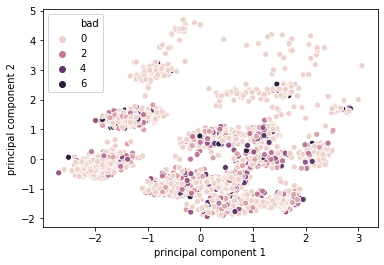

In [30]:
sns.scatterplot(x="principal component 1",
                y="principal component 2",
                hue="bad",
                data=finalDfwrong)

In [ ]:
# POINTS WITH A VALUE OF 2 OR LESS CAN BE ELIMINATED USING A VOTING CLASSIFIER
# GIVEN THE NUMBER OF POINTS WITH A VALUE OF 2 OR LESS, A VOTING CLASSIFIER
# SEEMS TO BE A GOOD IDEA

In [31]:
from sklearn.ensemble import VotingClassifier
estimators=[('svc', svc), ('knn', knn), ('rfc', rfc), ('ada', ada), ('xgb', xgb)]
eclf1 = VotingClassifier(estimators=estimators,
                        voting='hard')

In [32]:
eclf1.fit(X_train,
        Y_train)

eclf1_predictions = eclf1.predict(X_test)
print('ensemble accuracy',accuracy_score(eclf1_predictions, Y_test))

ensemble accuracy 0.8854135338345864


In [ ]:
# THE RESULTS OF THE VOTING CLASSIFIER (89%) ARE NOT BETTER THAN THE XGBOOST ALONE
# WE WILL TRY TO GET BETTER RESULTS USING A STACKING CLASSIFIER

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stack = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression())

In [34]:
stack.fit(X_train,
        Y_train)
stack_predictions = stack.predict(X_test)
print('stacking accuracy',accuracy_score(stack_predictions, Y_test))

stacking accuracy 0.9251127819548872


In [ ]:
# USING THE STACKING CLASSIFIER WE MANAGE TO GET 92.5% ACCURACY ON THE TESTING SET